In [0]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:


# Define a simple sequential model
def create_model():
  model = keras.Sequential([
      keras.layers.Dense(512, "sigmoid", input_shape=(784,)),
      keras.layers.Dense(11)]
  )
  model.compile(
      optimizer='adam',
      loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy'])
  return model

model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 11)                5643      
Total params: 407,563
Trainable params: 407,563
Non-trainable params: 0
_________________________________________________________________


In [3]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_labels = train_labels
test_labels = test_labels

train_images = train_images.reshape(-1, 28 * 28) / 255.0
test_images = test_images.reshape(-1, 28 * 28) / 255.0
test_images.shape #this is one gigantic tensor of shape (10000, 784), so it contains a row for every digit sample

11493376/11490434 [==============================] - 0s 0us/step


(10000, 784)

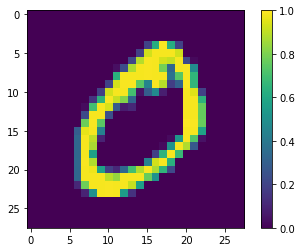

0

In [15]:
datapoint = 1

plt.figure()
plt.imshow(train_images[datapoint].reshape(28, 28))
plt.colorbar()
plt.grid(False)
plt.show()

train_labels[datapoint]

In [22]:
#save the weights of the model

checkpoint_path = "training_2/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train the model with the new callback
model.fit(train_images, 
          train_labels,  
          epochs=10,
          validation_data=(test_images,test_labels),
          callbacks=[cp_callback]
          )

Epoch 1/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.0100 - accuracy: 0.9978
Epoch 00001: saving model to training_1/cp.ckpt
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0100 - accuracy: 0.9978 - val_loss: 0.0604 - val_accuracy: 0.9826
Epoch 2/10
1865/1875 [============================>.] - ETA: 0s - loss: 0.0084 - accuracy: 0.9981
Epoch 00002: saving model to training_1/cp.ckpt
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0084 - accuracy: 0.9981 - val_loss: 0.0643 - val_accuracy: 0.9825
Epoch 3/10
1866/1875 [============================>.] - ETA: 0s - loss: 0.0053 - accuracy: 0.9989
Epoch 00003: saving model to training_1/cp.ckpt
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0053 - accuracy: 0.9989 - val_loss: 0.0705 - val_accuracy: 0.9807
Epoch 4/10
1868/1875 [============================>.] - ETA: 0s - loss: 0.0051 - accuracy: 0.9990
Epoch 00004: saving model to training_1/cp.ckpt
1875/1875 [======

In [17]:
#load the weights of the model
model.load_weights(r"training_1/cp.ckpt")

In [21]:
from google.colab import files
!zip -r /content/training_1.zip /content/training_1
files.download('/content/training_1.zip') 

  adding: content/training_1/ (stored 0%)
  adding: content/training_1/cp.ckpt.data-00000-of-00001 (deflated 12%)
  adding: content/training_1/cp.ckpt.index (deflated 57%)
  adding: content/training_1/checkpoint (deflated 38%)


In [35]:
probability_model = tf.keras.Sequential([
                                         tf.keras.layers.Reshape((-1,28*28), input_shape= ),
                                         model, 
                                         tf.keras.layers.Softmax()]) #this is just our model with a layer behind it that turns the output into propabilities
#np.argmax(probability_model.predict(train_images[datapoint]))
train_images[datapoint].shape

(784,)